In [1]:

import numpy as np
import pandas as pd


#Read files:
train = pd.read_csv("C:/Users/Emma/datasciencenigeriacomp1streg/train.csv")
test = pd.read_csv("C:/Users/Emma/datasciencenigeriacomp1streg/test.csv")

In [2]:
train[:5]

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [3]:
# check discrepancy btw two sets
train.columns.equals(test.columns)

False

In [4]:
# check different column
train.columns.difference(test.columns)

Index(['Product_Supermarket_Sales'], dtype='object')

In [5]:
# combine two sets
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print(train.shape, test.shape, data.shape)

(4990, 14) (3532, 13) (8522, 14)


C:\Users\Emma\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [6]:
data.describe()

,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Sales,Product_Weight,Supermarket_Opening_Year
count,8522.000000,8522.000000,4990.000000,7059.000000,8522.000000
mean,352.471687,0.066134,6103.520164,12.857115,2004.831847
std,155.693760,0.051600,4447.333835,4.643572,8.372251
min,78.230000,0.000000,83.230000,4.555000,1992.000000
25%,234.542500,0.026988,2757.660000,8.772500,1994.000000
50%,357.450000,0.053935,5374.675000,12.600000,2006.000000
75%,464.130000,0.094594,8522.240000,16.850000,2011.000000
max,667.220000,0.328391,32717.410000,21.350000,2016.000000


In [7]:
data.columns

Index(['Product_Fat_Content', 'Product_Identifier', 'Product_Price',
       'Product_Shelf_Visibility', 'Product_Supermarket_Identifier',
       'Product_Supermarket_Sales', 'Product_Type', 'Product_Weight',
       'Supermarket _Size', 'Supermarket_Identifier',
       'Supermarket_Location_Type', 'Supermarket_Opening_Year',
       'Supermarket_Type', 'source'],
      dtype='object')

In [8]:
data.dtypes

Product_Fat_Content                object
Product_Identifier                 object
Product_Price                     float64
Product_Shelf_Visibility          float64
Product_Supermarket_Identifier     object
Product_Supermarket_Sales         float64
Product_Type                       object
Product_Weight                    float64
Supermarket _Size                  object
Supermarket_Identifier             object
Supermarket_Location_Type          object
Supermarket_Opening_Year            int64
Supermarket_Type                   object
source                             object
dtype: object

In [9]:
# check missing value
data.apply(lambda x: sum(x.isnull()))

Product_Fat_Content                  0
Product_Identifier                   0
Product_Price                        0
Product_Shelf_Visibility             0
Product_Supermarket_Identifier       0
Product_Supermarket_Sales         3532
Product_Type                         0
Product_Weight                    1463
Supermarket _Size                 2409
Supermarket_Identifier               0
Supermarket_Location_Type            0
Supermarket_Opening_Year             0
Supermarket_Type                     0
source                               0
dtype: int64

In [10]:

# check factor variable levels
data.apply(lambda x: len(x.unique()))

Product_Fat_Content                  3
Product_Identifier                1559
Product_Price                     5418
Product_Shelf_Visibility          7879
Product_Supermarket_Identifier    8522
Product_Supermarket_Sales         2687
Product_Type                        16
Product_Weight                     416
Supermarket _Size                    4
Supermarket_Identifier              10
Supermarket_Location_Type            3
Supermarket_Opening_Year             9
Supermarket_Type                     4
source                               2
dtype: int64

In [11]:
# Filter categorical variables
categorical_columns = [x for x in data.columns if data.dtypes[x] == 'object']

# Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Product_Identifier','Supermarket_Identifier','source']]

# Frequency table 
print("Frequency Table")
for col in categorical_columns:
    print('\nFrequency table for varible %s' % col)
    print(data[col].value_counts(sort=True, dropna=False))

Frequency Table

Frequency table for varible Product_Fat_Content
Low Fat          5200
Normal Fat       3006
Ultra Low fat     316
Name: Product_Fat_Content, dtype: int64

Frequency table for varible Product_Supermarket_Identifier
FDT12_CHUKWUDI027    1
FDX57_CHUKWUDI018    1
FDZ59_CHUKWUDI013    1
FDJ48_CHUKWUDI017    1
DRI37_CHUKWUDI018    1
FDI44_CHUKWUDI027    1
FDX59_CHUKWUDI018    1
FDQ08_CHUKWUDI046    1
FDE44_CHUKWUDI013    1
FDT48_CHUKWUDI027    1
FDC58_CHUKWUDI035    1
NCK07_CHUKWUDI035    1
DRI11_CHUKWUDI049    1
FDU35_CHUKWUDI010    1
NCF54_CHUKWUDI017    1
FDM16_CHUKWUDI018    1
FDI08_CHUKWUDI017    1
FDG17_CHUKWUDI017    1
FDR35_CHUKWUDI049    1
FDQ26_CHUKWUDI018    1
FDV26_CHUKWUDI027    1
FDS23_CHUKWUDI019    1
FDH52_CHUKWUDI017    1
NCX06_CHUKWUDI018    1
FDK08_CHUKWUDI049    1
FDZ59_CHUKWUDI019    1
FDE44_CHUKWUDI035    1
FDI44_CHUKWUDI049    1
NCK17_CHUKWUDI017    1
FDY11_CHUKWUDI046    1
                    ..
DRQ35_CHUKWUDI035    1
FDS48_CHUKWUDI019    1
NCP17_CHUK

In [12]:
# low fat, Lf = Low Fat
# reg = Ragular 
data['Product_Fat_Content'].replace({'LF': 'Low Fat', 
                                  'low fat': 'Low Fat'}, inplace=True)
data["Product_Fat_Content"].value_counts(sort=True, dropna=False)

Low Fat          5200
Normal Fat       3006
Ultra Low fat     316
Name: Product_Fat_Content, dtype: int64

In [13]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

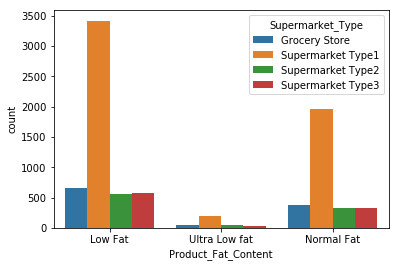

In [14]:
sns.countplot(x="Product_Fat_Content", hue="Supermarket_Type", data=data);

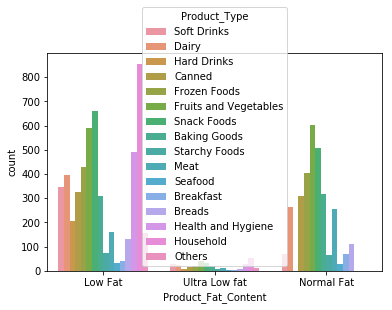

In [15]:

sns.countplot(x="Product_Fat_Content",  hue="Product_Type", data=data);

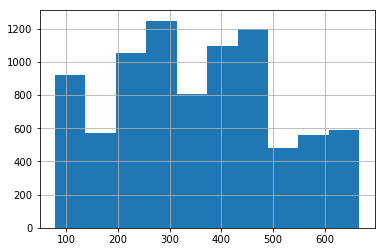

In [16]:
data['Product_Price'].hist()

In [17]:
# Using data description, fill these missing values with "None"

data['Supermarket _Size'] = data['Supermarket _Size'].fillna('None')
print("'None' - treated...")

# Fill these features with their mean, the mean value. 
data['Product_Weight'] = data['Product_Weight'].fillna((data['Product_Weight'].mean()))
print("'mean' - treated...")

data_na = data.isnull().sum()
print("Features with missing values: ", data_na.drop(data_na[data_na == 0].index))

'None' - treated...
'mean' - treated...
Features with missing values:  Product_Supermarket_Sales    3532
dtype: int64


In [18]:
# data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')
data.groupby('Supermarket_Type').Product_Supermarket_Sales.mean()

Supermarket_Type
Grocery Store          826.633867
Supermarket Type1     6442.040623
Supermarket Type2     5540.621680
Supermarket Type3    12561.189697
Name: Product_Supermarket_Sales, dtype: float64

In [19]:
# determine average visibility of a product
# data.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_avg = data.groupby('Product_Identifier').Product_Shelf_Visibility.mean()

# impute 0 values with mean visibility of that product
miss_idx = (data['Product_Shelf_Visibility'] == 0)

print('Number of 0 values initially: %d' % sum(miss_idx))
data.loc[miss_idx, 'Product_Shelf_Visibility'] = data.loc[miss_idx, 'Product_Identifier'].apply(lambda x: visibility_avg[x])
print('Number of 0 values after modification: %d' % sum(data['Product_Shelf_Visibility'] == 0))

Number of 0 values initially: 526
Number of 0 values after modification: 0


In [20]:
# Determine another variable with means ratio
data['Product_Visibility_MeanRatio'] = data.apply(lambda x: x['Product_Shelf_Visibility']/visibility_avg[x['Product_Identifier']], axis=1)
print(data['Product_Visibility_MeanRatio'].describe())

count    8522.000000
mean        1.061723
std         0.237092
min         0.678833
25%         0.903575
50%         1.000000
75%         1.055709
max         2.729420
Name: Product_Visibility_MeanRatio, dtype: float64


In [21]:
# get the first two characters of ID
data['Product_Type_Combined'] = data['Product_Identifier'].apply(lambda x: x[0:2])

# rename them to more intuitive categories
data['Product_Type_Combined'] = data['Product_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Product_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1598
Drinks             799
Name: Product_Type_Combined, dtype: int64

In [22]:
# get idx of train part
train_idx = (data['source'] == 'train')

# subset the data
sub_data = data.loc[train_idx, ['Product_Identifier', 'Product_Supermarket_Sales']]

# get avg. item sales by item_Identifier
item_avg_sales = sub_data.groupby("Product_Identifier").Product_Supermarket_Sales.mean()

# extract the avg. sale percentile to group them into four categories
percentile = np.percentile(item_avg_sales, np.arange(0, 100, 25))
twentyfive = percentile[1]
fifty = percentile[2]
seventyfive = percentile[3]

# extract the Item_Identifier idx that fall between those percentiles
first_idx = item_avg_sales.apply(lambda x: x < twentyfive)
second_idx = item_avg_sales.apply(lambda x: x >= twentyfive and x < fifty)
third_idx = item_avg_sales.apply(lambda x: x >= fifty and x < seventyfive)
fourth_idx = item_avg_sales.apply(lambda x: x > seventyfive)

# extract the Item_Identifier names for each percentiles
first = item_avg_sales.loc[first_idx, ].index.values
second = item_avg_sales.loc[second_idx, ].index.values
thrid = item_avg_sales.loc[third_idx, ].index.values
fourth = item_avg_sales.loc[fourth_idx, ].index.values

# function to categorize each row
def id_to_percentile(x):
    if x in first:
        return('first')
    elif x in second:
        return('second')
    elif x in thrid:
        return('thrid')
    elif x in fourth:
        return('fourth')

data['Percentile'] = data['Product_Identifier'].apply(lambda x: id_to_percentile(x))

In [23]:
data['Percentile'].value_counts()

first     2058
thrid     2048
second    1994
fourth    1947
Name: Percentile, dtype: int64

In [24]:
# Years, since the data is collected in 2013, we use 2013 as a starting year
data['Outlet_Years'] = 2013 - data['Supermarket_Opening_Year']
data['Outlet_Years'].describe()

count    8522.000000
mean        8.168153
std         8.372251
min        -3.000000
25%         2.000000
50%         7.000000
75%        19.000000
max        21.000000
Name: Outlet_Years, dtype: float64

In [25]:
np.array(data.select_dtypes(include=["object_"]).columns)

array(['Product_Fat_Content', 'Product_Identifier',
       'Product_Supermarket_Identifier', 'Product_Type',
       'Supermarket _Size', 'Supermarket_Identifier',
       'Supermarket_Location_Type', 'Supermarket_Type', 'source',
       'Product_Type_Combined', 'Percentile'], dtype=object)

In [26]:
data.head()

,Product_Fat_Content,Product_Identifier,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Supermarket_Sales,Product_Type,Product_Weight,Supermarket _Size,Supermarket_Identifier,Supermarket_Location_Type,Supermarket_Opening_Year,Supermarket_Type,source,Product_Visibility_MeanRatio,Product_Type_Combined,Percentile,Outlet_Years
0,Low Fat,DRA12,357.54,0.068535,DRA12_CHUKWUDI010,709.08,Soft Drinks,11.6,None,CHUKWUDI010,Cluster 3,2005,Grocery Store,train,2.144657,Drinks,second,8
1,Low Fat,DRA12,355.79,0.040912,DRA12_CHUKWUDI013,6381.69,Soft Drinks,11.6,High,CHUKWUDI013,Cluster 3,1994,Supermarket Type1,train,1.280248,Drinks,second,19
2,Low Fat,DRA12,350.79,0.041178,DRA12_CHUKWUDI017,6381.69,Soft Drinks,11.6,None,CHUKWUDI017,Cluster 2,2014,Supermarket Type1,train,1.288562,Drinks,second,-1
3,Low Fat,DRA12,355.04,0.041113,DRA12_CHUKWUDI018,2127.23,Soft Drinks,11.6,Medium,CHUKWUDI018,Cluster 3,2016,Supermarket Type2,train,1.286534,Drinks,second,-3
4,Ultra Low fat,DRA12,354.79,0.031956,DRA12_CHUKWUDI035,2481.77,Soft Drinks,11.6,Small,CHUKWUDI035,Cluster 2,2011,Supermarket Type1,train,1.000000,Drinks,second,2


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# New variable for outlet
data['Outlet'] = le.fit_transform(data['Supermarket_Identifier'])
#var_mod = ['Product_Fat_Content', 'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type', 'Product_Type_Combined', 'Percentile']
le = LabelEncoder()
data['Product_Fat_Content'] = le.fit_transform(data['Product_Fat_Content'])
data['Supermarket _Size'] = le.fit_transform(data['Supermarket _Size'])
data['Supermarket_Location_Type'] = le.fit_transform(data['Supermarket_Location_Type'])
data['Supermarket_Type'] = le.fit_transform(data['Supermarket_Type'])
data['Product_Type_Combined'] = le.fit_transform(data['Product_Type_Combined'])


In [28]:
#data['Percentile'] = le.fit_transform(data['Percentile'])

In [29]:
data.head()

,Product_Fat_Content,Product_Identifier,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Supermarket_Sales,Product_Type,Product_Weight,Supermarket _Size,Supermarket_Identifier,Supermarket_Location_Type,Supermarket_Opening_Year,Supermarket_Type,source,Product_Visibility_MeanRatio,Product_Type_Combined,Percentile,Outlet_Years,Outlet
0,0,DRA12,357.54,0.068535,DRA12_CHUKWUDI010,709.08,Soft Drinks,11.6,2,CHUKWUDI010,2,2005,0,train,2.144657,0,second,8,0
1,0,DRA12,355.79,0.040912,DRA12_CHUKWUDI013,6381.69,Soft Drinks,11.6,0,CHUKWUDI013,2,1994,1,train,1.280248,0,second,19,1
2,0,DRA12,350.79,0.041178,DRA12_CHUKWUDI017,6381.69,Soft Drinks,11.6,2,CHUKWUDI017,1,2014,1,train,1.288562,0,second,-1,2
3,0,DRA12,355.04,0.041113,DRA12_CHUKWUDI018,2127.23,Soft Drinks,11.6,1,CHUKWUDI018,2,2016,2,train,1.286534,0,second,-3,3
4,2,DRA12,354.79,0.031956,DRA12_CHUKWUDI035,2481.77,Soft Drinks,11.6,3,CHUKWUDI035,1,2011,1,train,1.000000,0,second,2,6


In [30]:
# one-hot-encoding
data = pd.get_dummies(data, columns=['Product_Fat_Content', 'Supermarket_Location_Type', 'Supermarket _Size', 'Supermarket_Type',
                              'Product_Type_Combined', 'Outlet', 'Percentile'])

In [31]:
data.head()

,Product_Identifier,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Supermarket_Sales,Product_Type,Product_Weight,Supermarket_Identifier,Supermarket_Opening_Year,source,...,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Percentile_first,Percentile_fourth,Percentile_second,Percentile_thrid
0,DRA12,357.54,0.068535,DRA12_CHUKWUDI010,709.08,Soft Drinks,11.6,CHUKWUDI010,2005,train,...,0,0,0,0,0,0,0,0,1,0
1,DRA12,355.79,0.040912,DRA12_CHUKWUDI013,6381.69,Soft Drinks,11.6,CHUKWUDI013,1994,train,...,0,0,0,0,0,0,0,0,1,0
2,DRA12,350.79,0.041178,DRA12_CHUKWUDI017,6381.69,Soft Drinks,11.6,CHUKWUDI017,2014,train,...,0,0,0,0,0,0,0,0,1,0
3,DRA12,355.04,0.041113,DRA12_CHUKWUDI018,2127.23,Soft Drinks,11.6,CHUKWUDI018,2016,train,...,0,0,0,0,0,0,0,0,1,0
4,DRA12,354.79,0.031956,DRA12_CHUKWUDI035,2481.77,Soft Drinks,11.6,CHUKWUDI035,2011,train,...,0,0,1,0,0,0,0,0,1,0


In [32]:
data.dtypes

Product_Identifier                 object
Product_Price                     float64
Product_Shelf_Visibility          float64
Product_Supermarket_Identifier     object
Product_Supermarket_Sales         float64
Product_Type                       object
Product_Weight                    float64
Supermarket_Identifier             object
Supermarket_Opening_Year            int64
source                             object
Product_Visibility_MeanRatio      float64
Outlet_Years                        int64
Product_Fat_Content_0               uint8
Product_Fat_Content_1               uint8
Product_Fat_Content_2               uint8
Supermarket_Location_Type_0         uint8
Supermarket_Location_Type_1         uint8
Supermarket_Location_Type_2         uint8
Supermarket _Size_0                 uint8
Supermarket _Size_1                 uint8
Supermarket _Size_2                 uint8
Supermarket _Size_3                 uint8
Supermarket_Type_0                  uint8
Supermarket_Type_1                

In [33]:
# drop the columns which have been converted to different types
data.drop(['Product_Type', 'Supermarket_Opening_Year', 'Product_Identifier', 'Supermarket_Identifier'], axis=1, inplace=True)

# divide into test and train
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

# drop unnecessary columns
test.drop(['Product_Supermarket_Sales', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

# export files as modified versions
train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

C:\Users\Emma\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
train.head()

,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Supermarket_Sales,Product_Weight,Product_Visibility_MeanRatio,Outlet_Years,Product_Fat_Content_0,Product_Fat_Content_1,Product_Fat_Content_2,...,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Percentile_first,Percentile_fourth,Percentile_second,Percentile_thrid
0,357.54,0.068535,DRA12_CHUKWUDI010,709.08,11.6,2.144657,8,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,355.79,0.040912,DRA12_CHUKWUDI013,6381.69,11.6,1.280248,19,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,350.79,0.041178,DRA12_CHUKWUDI017,6381.69,11.6,1.288562,-1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,355.04,0.041113,DRA12_CHUKWUDI018,2127.23,11.6,1.286534,-3,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,354.79,0.031956,DRA12_CHUKWUDI035,2481.77,11.6,1.000000,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [35]:
# Save the 'Id' column
train_ID = train['Product_Supermarket_Identifier']
test_ID = test['Product_Supermarket_Identifier']

In [36]:
# Also save the target value, as we will remove this
y_train = train.Product_Supermarket_Sales.values

In [37]:
train.head()

,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Supermarket_Sales,Product_Weight,Product_Visibility_MeanRatio,Outlet_Years,Product_Fat_Content_0,Product_Fat_Content_1,Product_Fat_Content_2,...,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Percentile_first,Percentile_fourth,Percentile_second,Percentile_thrid
0,357.54,0.068535,DRA12_CHUKWUDI010,709.08,11.6,2.144657,8,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,355.79,0.040912,DRA12_CHUKWUDI013,6381.69,11.6,1.280248,19,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,350.79,0.041178,DRA12_CHUKWUDI017,6381.69,11.6,1.288562,-1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,355.04,0.041113,DRA12_CHUKWUDI018,2127.23,11.6,1.286534,-3,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,354.79,0.031956,DRA12_CHUKWUDI035,2481.77,11.6,1.000000,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [38]:
train.drop(['Product_Supermarket_Sales'], axis=1, inplace=True)
train.drop(['Product_Supermarket_Identifier'], axis=1, inplace=True)

C:\Users\Emma\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
test.head()

,Product_Price,Product_Shelf_Visibility,Product_Supermarket_Identifier,Product_Weight,Product_Visibility_MeanRatio,Outlet_Years,Product_Fat_Content_0,Product_Fat_Content_1,Product_Fat_Content_2,Supermarket_Location_Type_0,...,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Percentile_first,Percentile_fourth,Percentile_second,Percentile_thrid
4990,459.98,0.214125,DRA59_CHUKWUDI010,8.270,1.589432,8,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4991,464.98,0.127821,DRA59_CHUKWUDI013,8.270,0.948808,19,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4992,477.38,0.082171,DRB01_CHUKWUDI013,7.390,1.000542,19,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4993,472.63,0.011791,DRB13_CHUKWUDI010,6.115,1.473415,8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4994,473.13,0.007038,DRB13_CHUKWUDI013,6.115,0.879552,19,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
test.drop(['Product_Supermarket_Identifier'], axis=1, inplace=True)

C:\Users\Emma\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [41]:
#from sklearn import preprocessing
# Get column names first
#names = train.columns
# Create the Scaler object
#scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
#train = scaler.fit_transform(train)
#train = pd.DataFrame(train, columns=names)

In [42]:
#from sklearn import preprocessing
# Get column names first
#names = test.columns
# Create the Scaler object
#scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
#test = scaler.fit_transform(test)
#test = pd.DataFrame(test, columns=names)

In [43]:
train.head()

,Product_Price,Product_Shelf_Visibility,Product_Weight,Product_Visibility_MeanRatio,Outlet_Years,Product_Fat_Content_0,Product_Fat_Content_1,Product_Fat_Content_2,Supermarket_Location_Type_0,Supermarket_Location_Type_1,...,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Percentile_first,Percentile_fourth,Percentile_second,Percentile_thrid
0,357.54,0.068535,11.6,2.144657,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,355.79,0.040912,11.6,1.280248,19,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,350.79,0.041178,11.6,1.288562,-1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,355.04,0.041113,11.6,1.286534,-3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,354.79,0.031956,11.6,1.000000,2,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [44]:
print(train.shape)
print(test.shape)

(4990, 36)
(3532, 36)


In [45]:
# Imports
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [46]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.5, random_state=1))

In [47]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.5, l1_ratio=.9, random_state=3))

In [48]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [49]:
model = xgb.XGBRegressor()

In [50]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [51]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [52]:
# Lasso
model_lasso = Lasso(alpha=10)
#
score = rmsle_cv(model_lasso)
print("Lasso Regression Score: {:.4f}".format(score.mean()))

Lasso Regression Score: 2762.1640


In [53]:
# ElasticNet
model_enet = ElasticNet(alpha=10,l1_ratio=1)
#
score = rmsle_cv(model_enet)
print("ElasticNet Score: {:.4f}".format(score.mean()))

ElasticNet Score: 2762.1640


In [54]:
# XGBoost Regressor
model_xgb = xgb.XGBRegressor(n_estimators=300, max_depth=2, learning_rate=0.05)

score = rmsle_cv(model_xgb)
print("XGBoost Score: {:.4f}".format(score.mean()))

XGBoost Score: 2682.9959


In [55]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 2697.5511 (85.0214)



In [56]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [57]:
averaged_models = AveragingModels(models = (ENet, GBoost, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 2730.1340 (91.7183)



In [58]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [59]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost),
                                                 meta_model = lasso)


In [60]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [61]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = (stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

2519.444197607844


In [62]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = model_xgb.predict(test)
print(rmsle(y_train, xgb_train_pred))

2596.8323574028595


In [63]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = model_lgb.predict(test.values)
print(rmsle(y_train, lgb_train_pred))

2527.7087616405774


In [64]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
2516.5516786559524


In [65]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [66]:
ensemble

array([3561.16721794, 8950.15817165, 4447.81188085, ..., 9464.59290964,
       3928.08428132, 8861.08950771])

In [69]:
sub = pd.DataFrame()
sub['Product_Supermarket_Identifier'] = test_ID
sub['Product_Supermarket_Sales'] = ensemble
sub.to_csv('submission88.csv',index=False)

In [68]:
#ensemble